## modeling_logistic_regression_lesson

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import *
from prepare import *

In [2]:
df = prep_titanic(get_titanic_data())

In [3]:
df.shape

(891, 13)

In [4]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [5]:
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df)

In [7]:
# make the thing
scaler = MinMaxScaler()

# fit the thing
scaler.fit(train[['age', 'fare']])

# use the thing
train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

In [8]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
804,804,1,3,male,0.361239,0,0,0.013614,S,Third,Southampton,1,3
641,641,1,1,female,0.320468,0,0,0.135265,C,First,Cherbourg,1,0
756,756,0,3,male,0.374830,0,0,0.015216,S,Third,Southampton,1,3
814,814,0,3,male,0.408807,0,0,0.015713,S,Third,Southampton,1,3
836,836,0,3,male,0.279696,0,0,0.016908,S,Third,Southampton,1,3


insert zach's code here, to set up the log formula on training data set

In [10]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(train[['pclass','age','fare','sibsp','parch']], train.survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
logit.predict(train[['pclass','age','fare','sibsp','parch']])

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

below is the number of times our prediction matched the actual survival field, / total # of observations

(train.survived == train.prediction).sum() / train.shape[0]

In [12]:
logit.predict_proba(train[['pclass','age','fare','sibsp','parch']])

array([[0.77055003, 0.22944997],
       [0.28495462, 0.71504538],
       [0.77494326, 0.22505674],
       ...,
       [0.49775858, 0.50224142],
       [0.73563951, 0.26436049],
       [0.7610821 , 0.2389179 ]])

In [13]:
train['prediction'] = logit.predict(train[['pclass','age','fare','sibsp','parch']])

In [14]:
(train.survived == train.prediction).sum() / train.shape[0]

0.708411214953271

In [16]:
logit.score(train[['pclass','age','fare','sibsp','parch']], train.survived)

0.708411214953271

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train.survived, train.prediction)

array([[270,  51],
       [105, 109]])

In [18]:
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Thus in binary classification, the count of true negatives is C 0,0,
# false negatives is 1, 0, true positives is 1, 1 and false positives is 0, 1.

df = pd.DataFrame(confusion_matrix(train.survived, train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

df

,Pred -,Pred +
Actual -,270,51
Actual +,105,109


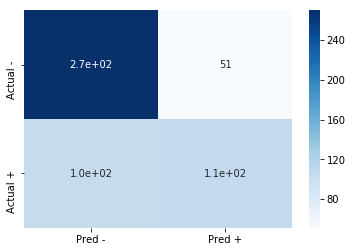

In [19]:
%matplotlib inline
import seaborn as sns

sns.heatmap(df, cmap='Blues', annot=True)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(train.survived, train.prediction))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       321
           1       0.68      0.51      0.58       214

   micro avg       0.71      0.71      0.71       535
   macro avg       0.70      0.68      0.68       535
weighted avg       0.70      0.71      0.70       535



In [22]:
train.survived.value_counts()

0    321
1    214
Name: survived, dtype: int64

In [23]:
train.prediction.value_counts()

0    375
1    160
Name: prediction, dtype: int64

In [24]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,prediction
804,804,1,3,male,0.361239,0,0,0.013614,S,Third,Southampton,1,3,0
641,641,1,1,female,0.320468,0,0,0.135265,C,First,Cherbourg,1,0,1
756,756,0,3,male,0.374830,0,0,0.015216,S,Third,Southampton,1,3,0
814,814,0,3,male,0.408807,0,0,0.015713,S,Third,Southampton,1,3,0
836,836,0,3,male,0.279696,0,0,0.016908,S,Third,Southampton,1,3,0


In [25]:
train.shape

(535, 14)